In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Функции инициализации центроидов

In [2]:
def rand_u_init(data, k):
    # just random initialization
    # suppose data - np.array
    return np.random.rand(k, data.shape[1]) * np.amax(data);

In [3]:
def distinct_points_init(data, k):
    u = np.zeros((k, 2))
    u[0] = data[0]
    for i in range(1, k):
        dist = np.sum(np.square(data - u[:i, np.newaxis]), axis=-1)
        u[i] = data[np.argmax(np.min(dist, axis=0))]
    return u

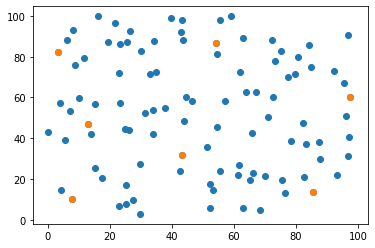

In [4]:
# пример иницализации
data = np.random.random(size=(100, 2)) * 100
x = distinct_points_init(data, 7)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(x[:, 0],x[:, 1])

# K-means model

In [5]:
hist = []
class KMeans:
    '''
    K-means divide points onto k clasters,
    where interclaster distance is minimized
    
    init:
    k - number of clasters
    u_init(data, k) - function, that initialize centroids
                      rand_u_init by default
                      
    fit:
    data - 2d array, points to clasterize
    t - number of iterations
    '''
    def __init__(self, k, u_init=rand_u_init):
        self.k = k # number of clasters
        self.u_init = u_init
        
    def fit(self, data, delta=0.01, t=100):
        # suppose data is np.array
        # length - number of points
        # n - number of dimensions
        length, n = data.shape
        u = self.u_init(data, self.k)
        for i in range(t):
            # calculate distinct matrix
            # dist_matrix[i, j] - distance between i centroid and j point
            dist_matrix = np.sum(np.square(x - u[:, np.newaxis]), axis=-1)
            # number of claster for each point
            c = np.argmin(dist_matrix, axis=0)
            u_new = np.zeros((self.k, 2))
            # recalculate centroids
            for i in range(self.k):
                p = data[c == i]
                l = p.shape[0]
                if l == 0:
                    continue
                u_new[i] = np.sum(p, axis=0) / l
            # early stop criteria
            if np.max(np.sum(np.square(u_new - u), axis = -1)) <= np.square(delta):
                return (u_new, c)
            u = u_new
        # return centroids and clasters
        return (u, c)

# Testing

In [6]:
def draw_clasters(data, u, c, k):
    for i in range(k):
        claster = c == i
        plt.scatter(data[claster, 0],data[claster, 1])
    for i in range(k):
        plt.scatter(u[i, 0], u[i, 1], marker='x', color='red')

## Стресс тест

In [8]:
x = np.random.random(size=(100000, 2))*1000000

In [9]:
%%time
model = KMeans(10, distinct_points_init)
u, c = model.fit(x)

Wall time: 2.57 s


In [10]:
x = np.random.random(size=(100000, 2))*10000

In [11]:
%%time
model = KMeans(100, distinct_points_init)
u, c = model.fit(x)

Wall time: 46.9 s


## 3 кучи с нормальным распределением, небольшой дисбаланс

In [12]:
x1 = np.random.normal(size=(50, 2))*3
x2 = np.random.normal(size=(100, 2))*2 + 10
x3 = np.random.normal(size=(200, 2)) + 20
x = np.concatenate((x1, x2, x3))

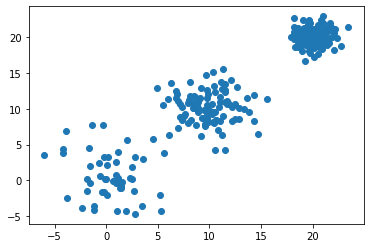

In [13]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

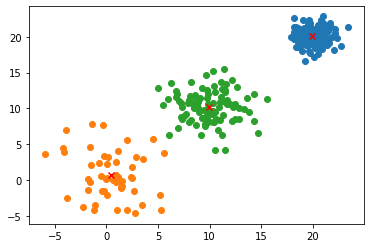

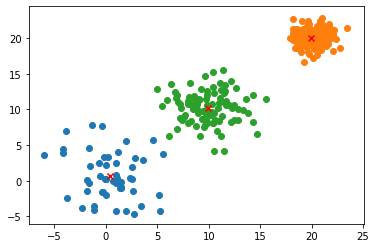

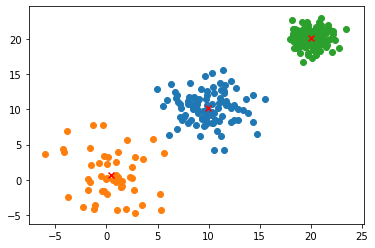

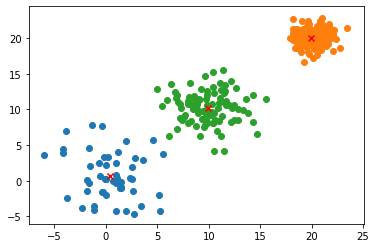

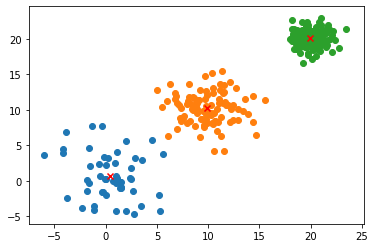

In [14]:
k = 3
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

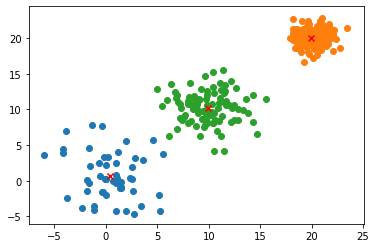

In [15]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Сильный дисбаланс классов с непропорциональным межкластерным расстоянием

In [16]:
x1 = np.random.normal(size=(5000, 2))*3
x2 = np.random.normal(size=(10000, 2))*2 + 30
x3 = np.random.normal(size=(20000, 2)) + 40
x = np.concatenate((x1, x2, x3))

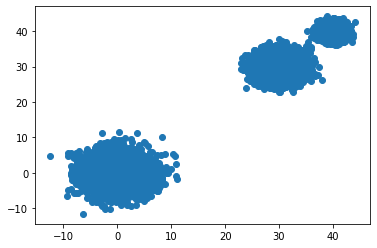

In [17]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

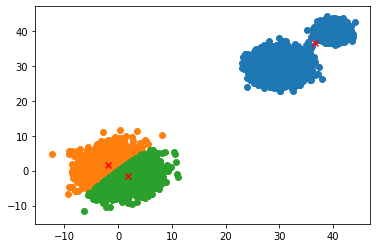

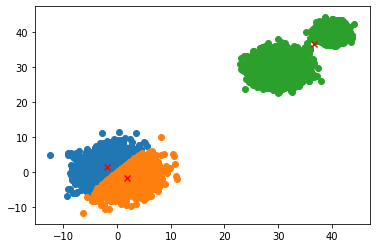

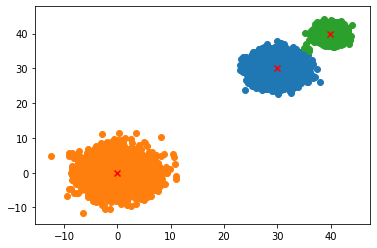

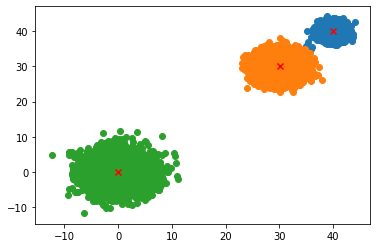

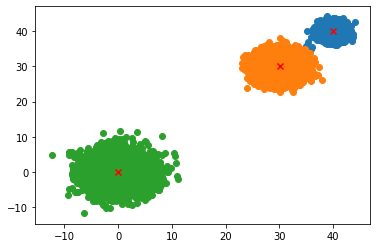

In [18]:
k = 3
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

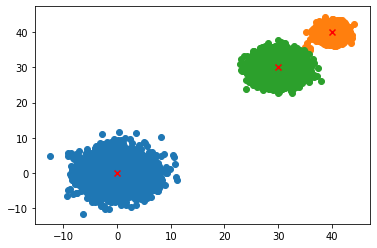

In [19]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Много малых классов

In [20]:
x1 = np.random.normal(size=(15, 2))*0.5
x2 = np.random.normal(size=(15, 2))*0.5 + 5
x3 = np.random.normal(size=(15, 2))*0.5 + 10
x4 = np.random.normal(size=(15, 2))*0.5 + 20
x5 = np.random.normal(size=(15, 2))*0.5 + 25
x6 = np.random.normal(size=(15, 2))*0.5 + 30
x7 = np.random.normal(size=(15, 2))*0.5 + 35
x8 = np.random.normal(size=(15, 2))*0.5 + 40
x9 = np.random.normal(size=(15, 2))*0.5 + 45
x = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9))

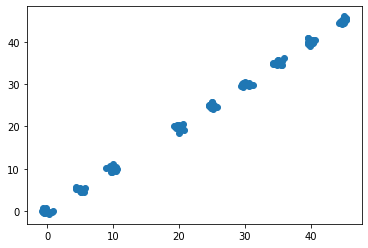

In [21]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор (5 инициализаций)

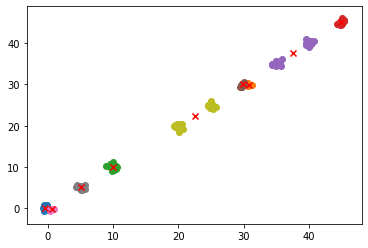

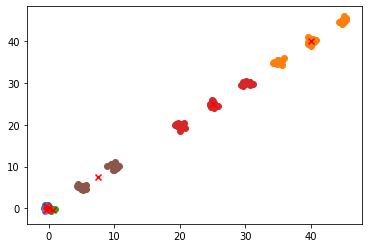

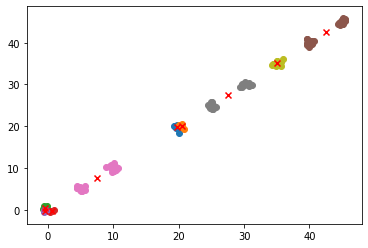

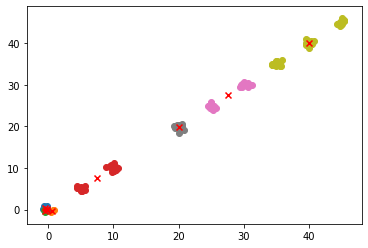

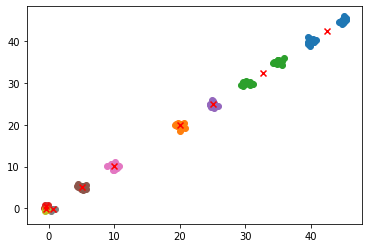

In [22]:
k = 9
for i in range(5):
    model = KMeans(k)
    u, c = model.fit(x)
    draw_clasters(x, u, c, k)
    plt.show()

инициализация k достаточно удалённых точек

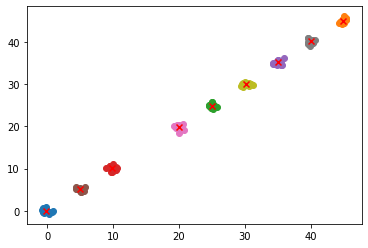

In [23]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

## Случайные данные

In [24]:
x = np.random.random(size=(1000, 2))*100

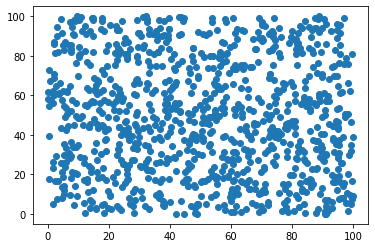

In [25]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

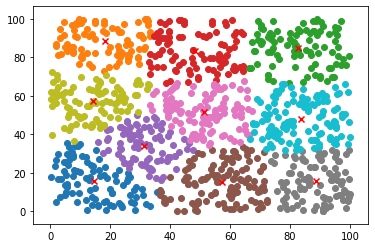

In [26]:
k  = 10
model = KMeans(k)
u, c = model.fit(x)
draw_clasters(x, u, c, k)
plt.show()

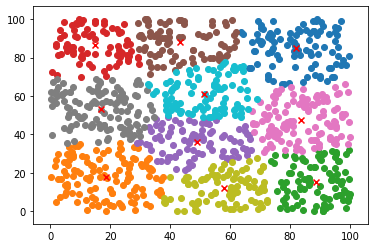

In [27]:
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

# Как выбрать К?

Выбор k на основе данных быстрее чем перебор всех наиболее правдоподобных. \
Попробуем подобрать на основе матрицы попарных расстояний

# Матрица попарных расстояний

Рассмотрим пример

In [28]:
x1 = np.random.normal(size=(50, 2))*2
x2 = np.random.normal(size=(100, 2))*2 + 10
x2[:, 1] -= 5
x3 = np.random.normal(size=(200, 2)) + 20
x3[:, 0] -= 15
x4 = np.random.normal(size=(70, 2))
x4[:, 1] += 10
x = np.concatenate((x1, x2, x3, x4))
np.random.shuffle(x)

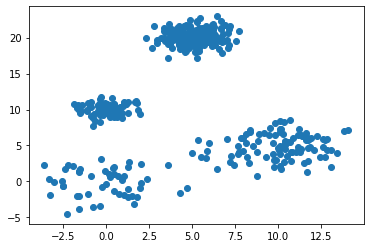

In [29]:
plt.scatter(x[:, 0],x[:, 1])

In [30]:
dist_matrix = np.sqrt(np.sum(np.square(x - x[:, np.newaxis]), axis=-1))

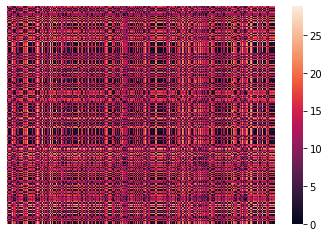

In [31]:
import seaborn as sns
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

найдём кластеры

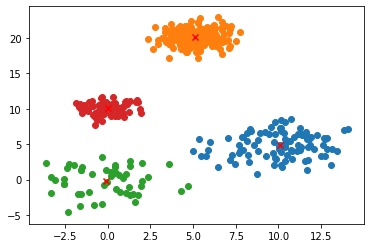

In [32]:
k = 4
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

Вот они сверху вниз:

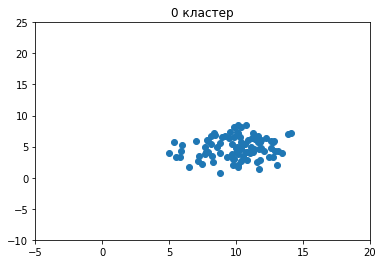

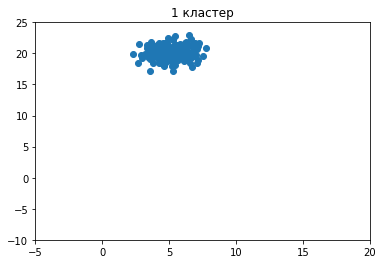

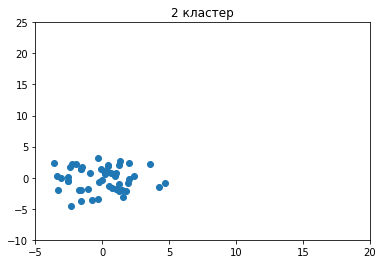

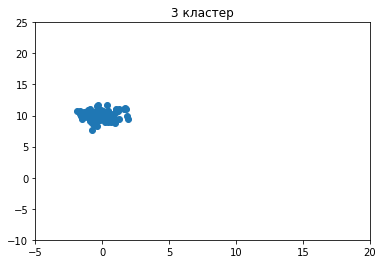

In [33]:
for i in range(k):
    plt.title(f"{i} кластер")
    plt.xlim(-5, 20)
    plt.ylim(-10, 25)
    plt.scatter(x[c==i, 0],x[c==i, 1], )
    plt.show()

Пусть площадь кластера i: s_i = max(dist_matrix(claster i)) ^2 \
Назовём плотность кластера c_i: p_i = c_i / s_i \
Чтобы упорядочить кластеры можно учитывать плотность \
Так же желательно учитывать расстояние до ближайших кластеров (высчитывается по магической формуле) \
Будем упорядочивать по значению: <плотность> * <межкластерное расстояние>^2 \
Кластеры с большим значением этого критерия более отделены от остальных (будем на это надеятся)

In [34]:
def sort_clasters(data, c, k):
    dist_matrix = np.sqrt(np.sum(np.square(data - data[:, np.newaxis]), axis=-1))
    p = np.zeros((k))
    min_interclaster_dist = np.zeros((k))
    for i in range(k):
        claster_i = c==i
        # np do  <dist_matrix[claster_i, claster_i]>  wrong!
        dist_i = dist_matrix[claster_i, :][:, claster_i]
        length = dist_i.shape[0]
        s = np.square(np.max(dist_i))
        p[i] =  length / s
        # interclaster distance
        claster_j = c!=i
        dist_ij = np.sort(dist_matrix[claster_i, :][:, claster_j].flatten())
        n = dist_ij.shape[0]
        # magic formula       
        min_interclaster_dist[i] = np.mean(dist_ij[:int(np.sqrt(n)) + 1])
    criteria = p * np.square(min_interclaster_dist)
    
    return np.argsort(criteria)

Упорядочим кластеры (произвольно)

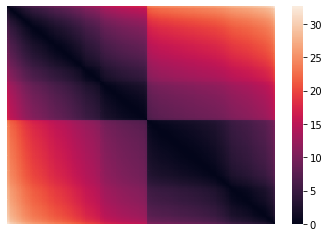

In [35]:
data = np.concatenate((c[:, np.newaxis], x), axis=-1)
data = np.sort(data, axis=0)[:, 1:]
dist_matrix_sorted = np.sqrt(np.sum(np.square(data - data[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix_sorted, xticklabels=False, yticklabels=False)

А теперь упорядочим кластеры по нашему критерию

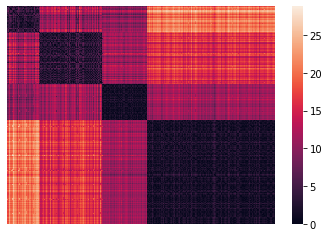

In [36]:
sorted_clasters = sort_clasters(x, c, k)
result = np.concatenate(tuple(x[c==i] for i in sorted_clasters), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

Чёрные квадраты получаются из-за того, что расстояние внутри точек кластера достаточно мало \
Чёрных квадратов ровно столько же сколько и кластеров \
Теперь возьмём менее удачный пример с неправильным выбором k, чтобы продемонстрировать смысл сортировки

In [37]:
x1 = np.random.normal(size=(50, 2))
x1[:, 0] += 7
x2 = np.random.normal(size=(100, 2))*2 + 10
x2[:, 1] -= 5
x3 = np.random.normal(size=(200, 2)) + 20
x3[:, 0] -= 15
x4 = np.random.normal(size=(70, 2))
x4[:, 1] += 9
x = np.concatenate((x1, x2, x3, x4))
np.random.shuffle(x)

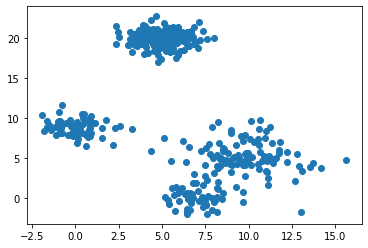

In [38]:
plt.scatter(x[:, 0],x[:, 1])

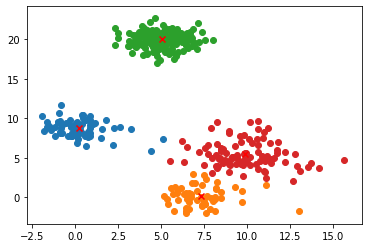

In [39]:
k = 4
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

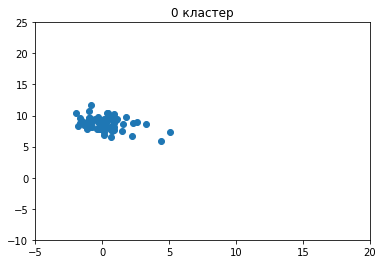

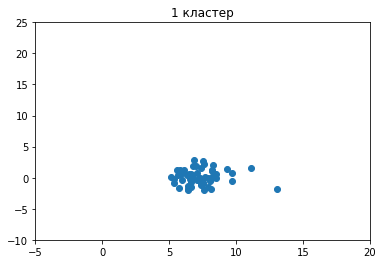

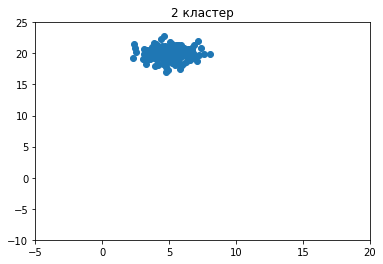

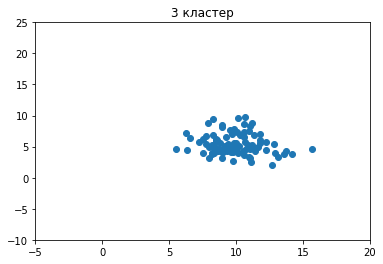

In [40]:
for i in range(k):
    plt.title(f"{i} кластер")
    plt.xlim(-5, 20)
    plt.ylim(-10, 25)
    plt.scatter(x[c==i, 0],x[c==i, 1], )
    plt.show()

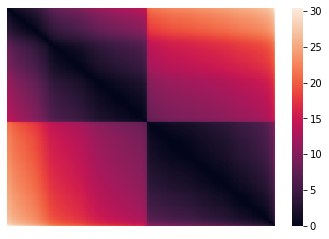

In [41]:
data = np.concatenate((c[:, np.newaxis], x), axis=-1)
data = np.sort(data, axis=0)[:, 1:]
dist_matrix_sorted = np.sqrt(np.sum(np.square(data - data[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix_sorted, xticklabels=False, yticklabels=False)

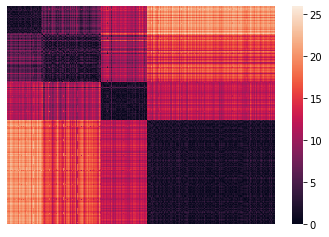

In [42]:
sorted_clasters = sort_clasters(x, c, k)
result = np.concatenate(tuple(x[c==i] for i in sorted_clasters), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

Видно, что 2 кластера достаточно близки, другие 2 более удалены, поэтому можно сделать предположение, что можно уменьшить k до 3

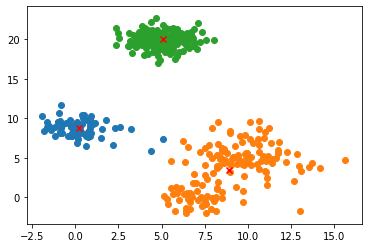

In [43]:
k = 3
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

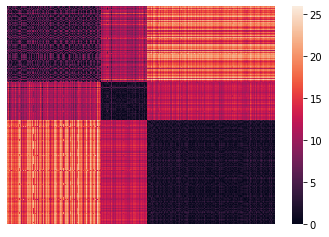

In [44]:
sorted_clasters = sort_clasters(x, c, k)
result = np.concatenate(tuple(x[c==i] for i in sorted_clasters), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

Здесь картина немного лучше. Таким образом, с помощью данной сортировки мы можем корректировать выбор k. \
Теперь попробуем выбрать k меньше чем нужно.

In [74]:
x1 = np.random.normal(size=(70, 2))
x1[:, 0] += 2
x2 = np.random.normal(size=(100, 2))*2 + 10
x2[:, 1] -= 5
x3 = np.random.normal(size=(200, 2)) + 15
x3[:, 0] -= 10
x4 = np.random.normal(size=(100, 2))
x4[:, 1] += 10
x = np.concatenate((x1, x2, x3, x4))
np.random.shuffle(x)

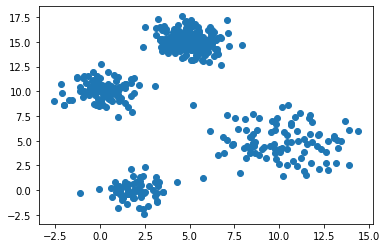

In [75]:
plt.scatter(x[:, 0],x[:, 1])

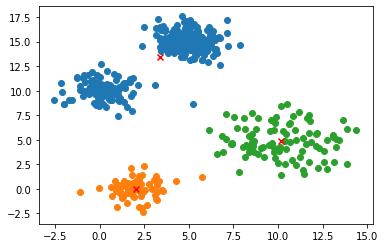

In [76]:
k = 3
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

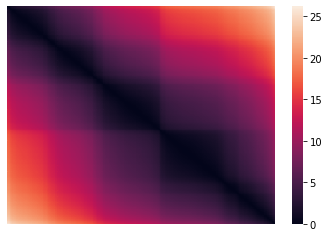

In [77]:
data = np.concatenate((c[:, np.newaxis], x), axis=-1)
data = np.sort(data, axis=0)[:, 1:]
dist_matrix_sorted = np.sqrt(np.sum(np.square(data - data[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix_sorted, xticklabels=False, yticklabels=False)

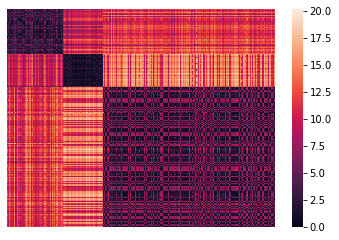

In [78]:
sorted_clasters = sort_clasters(x, c, k)
result = np.concatenate(tuple(x[c==i] for i in sorted_clasters), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

По матрице можно предположить что последний кластер можно разбить на несколько, добавим ещё один кластер

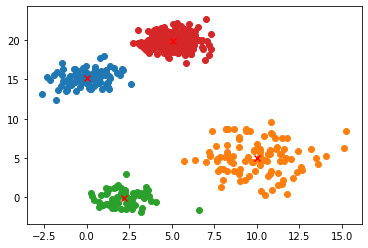

In [68]:
k = 4
model = KMeans(k, distinct_points_init)
u, c = model.fit(x)
draw_clasters(x, u, c, k)

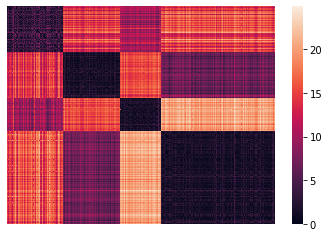

In [69]:
sorted_clasters = sort_clasters(x, c, k)
result = np.concatenate(tuple(x[c==i] for i in sorted_clasters), axis=0)
dist_matrix = np.sqrt(np.sum(np.square(result - result[:, np.newaxis]), axis=-1))
sns.heatmap(dist_matrix, xticklabels=False, yticklabels=False)

Критерий выевляет случаи, когда кластер разбит на несколько других.\ 
И плохо выевляет кластеры, которые можно успешно разбить на несколько других.\

Сложно предложить критерий упорядочивания кластеров в абстрактной задаче. \
Если мы знаем изначальные данные то более эффективным окажутся другие подходы выбора критерия:
- Если у нас проблема классификации, то вполне логично упорядочить по критерию Джини или энтропии.
- Для регрессии возможно подойдёт дисперсия, или другая характеристика разброса (для понимания значимости кластеров).
- Для улучшения качества предсказаний в задаче регрессии возможно подойдёт среденее, медиана, ... 
- ...